In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/CustomerChurn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.shape

(7043, 21)

In [6]:
features = data.columns.tolist
print(features)

<bound method IndexOpsMixin.tolist of Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')>


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [10]:
data['Churn'].value_counts()/len(data['Churn'])*100

,count
Churn,
No,73.463013
Yes,26.536987


DATA CLEANING

In [11]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


here we can see we dont have any null values in the given dataset


 FEATURE BINNING

In [12]:
print(data['tenure'].max())

72


In [13]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data.tenure, range(1, 80, 12), right=False, labels=labels)

In [14]:
data['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


In [15]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


**UNIVARIATE ANALYSIS**

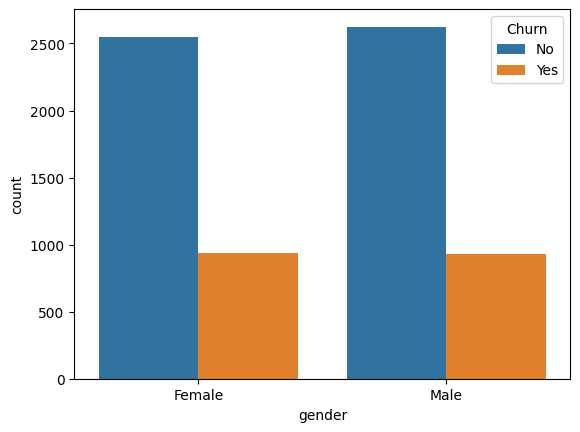

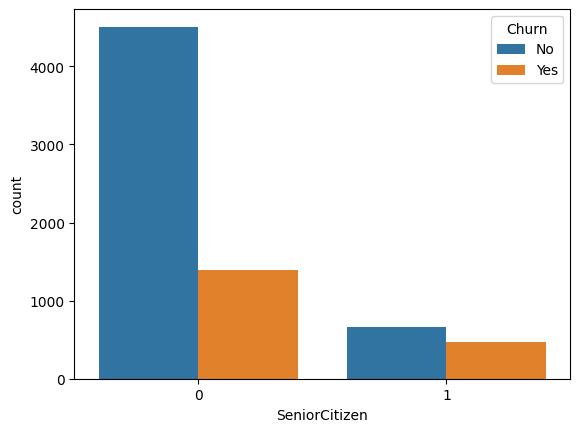

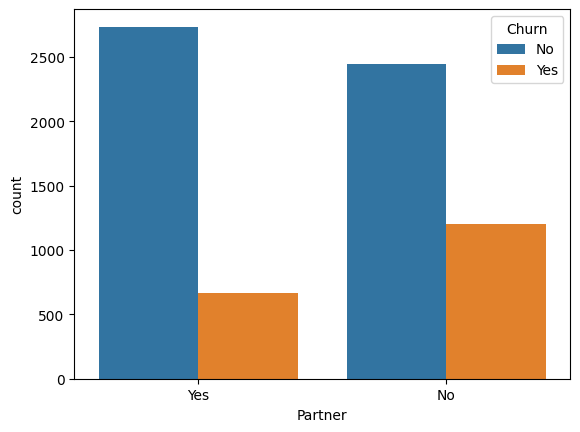

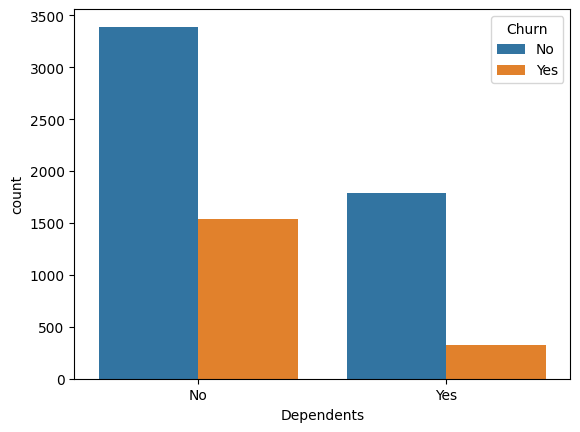

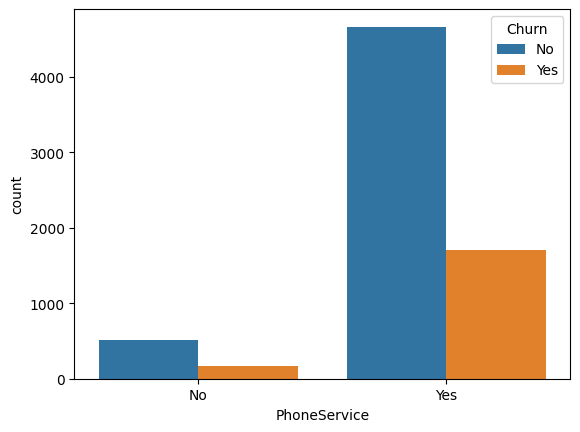

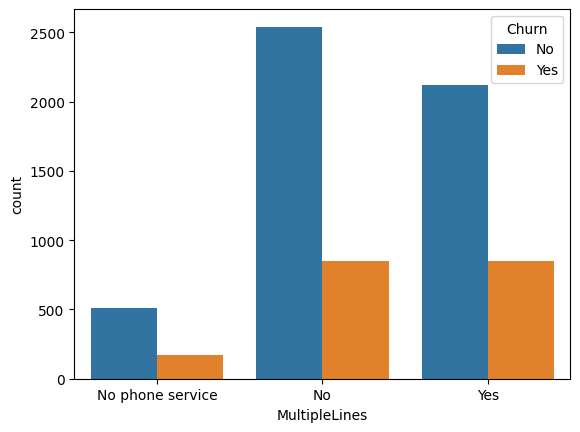

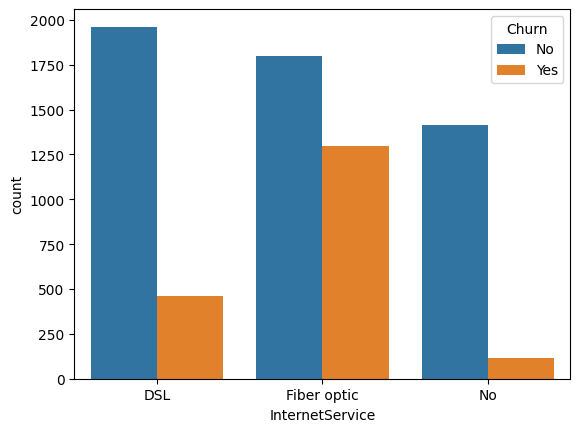

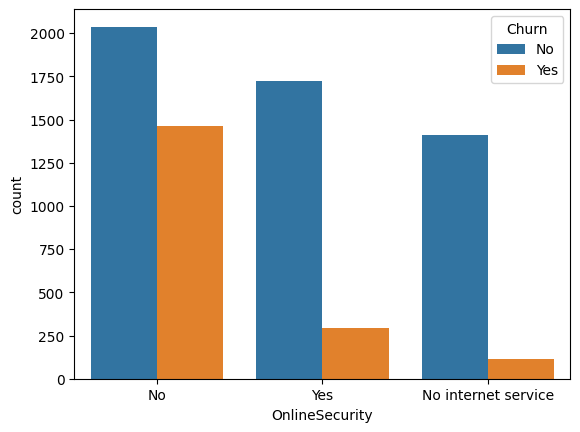

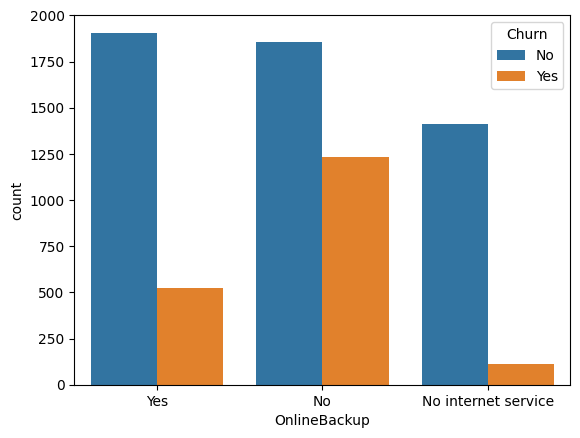

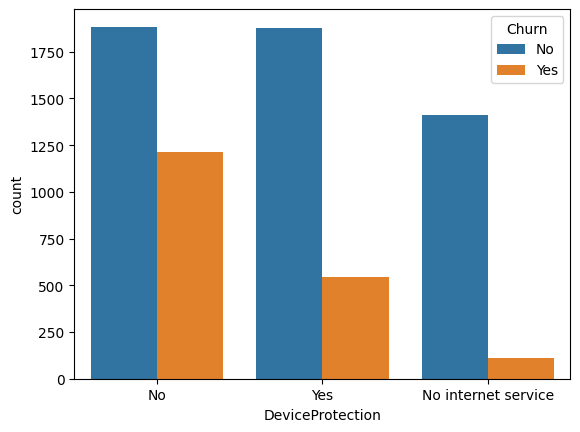

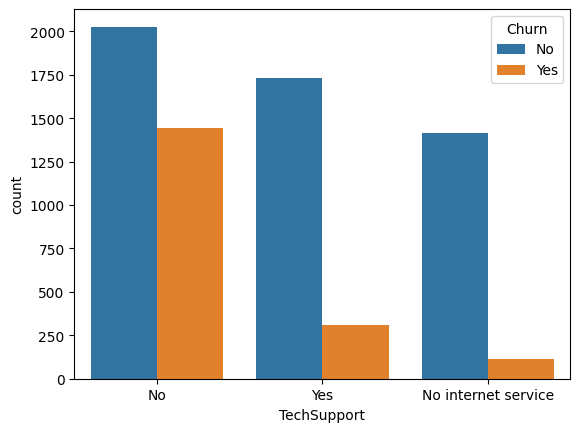

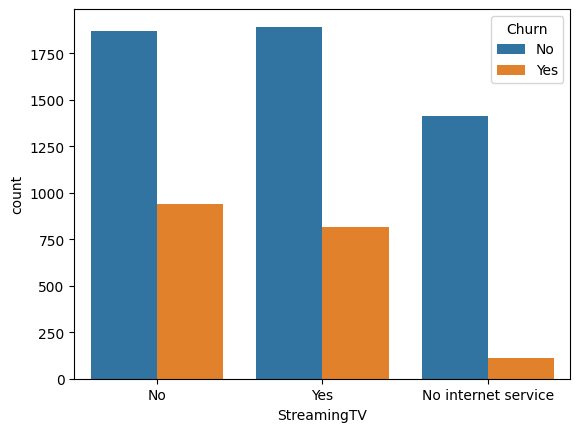

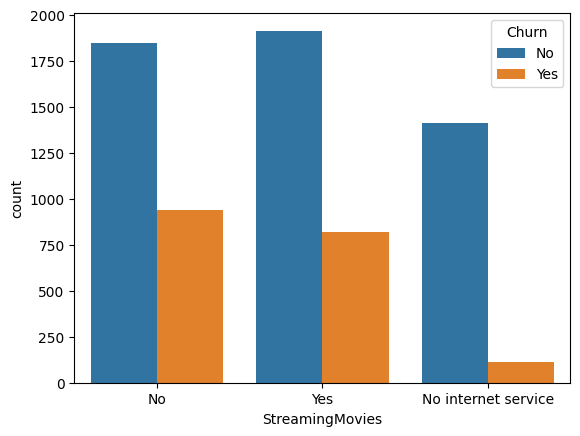

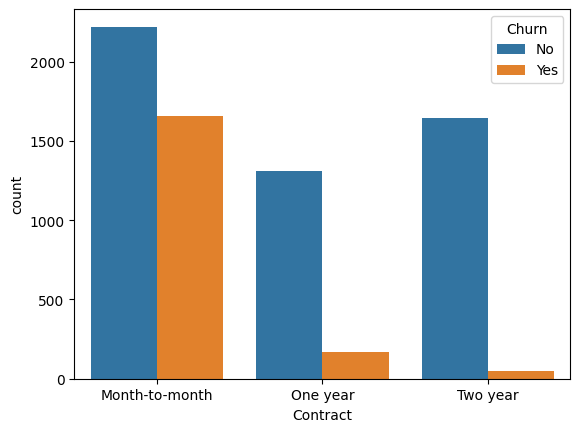

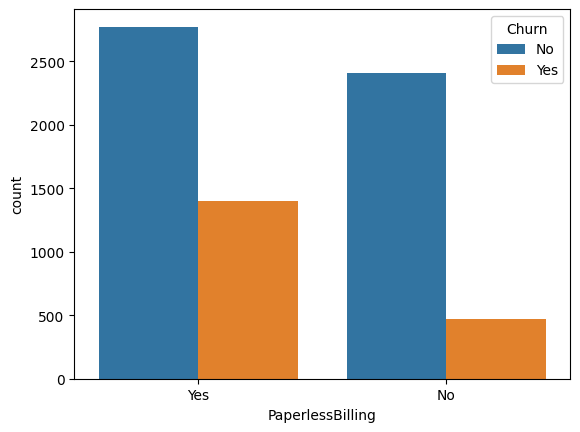

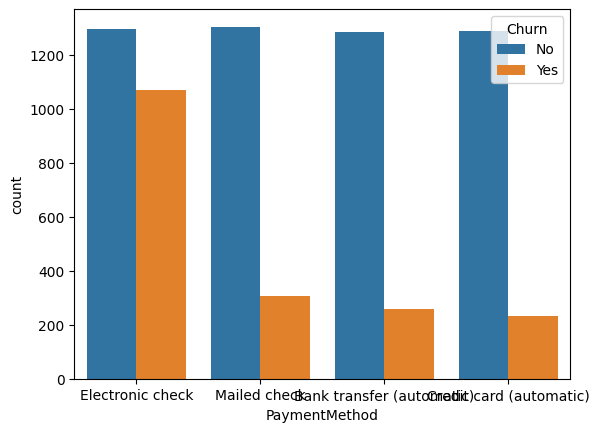

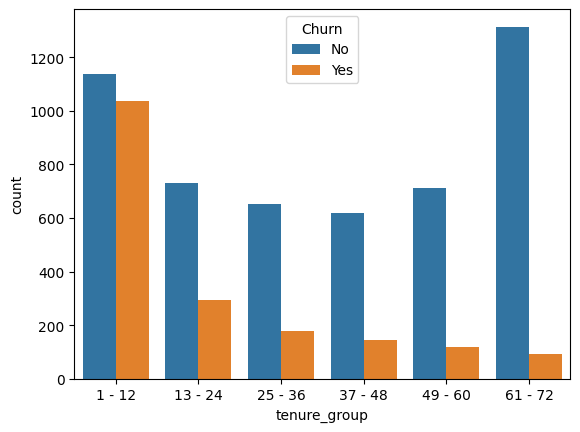

In [16]:
for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges','customerID','tenure'])):
    plt.figure(i)
    sns.countplot(data=data, x=predictor, hue='Churn')

change the churn variable into number

In [17]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)

In [18]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


feature encoding

In [19]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,0,34,56.95,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0,2,53.85,1,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,0,45,42.30,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,2,70.70,1,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


<ipython-input-20-bd540a948337>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ],
<ipython-input-20-bd540a948337>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

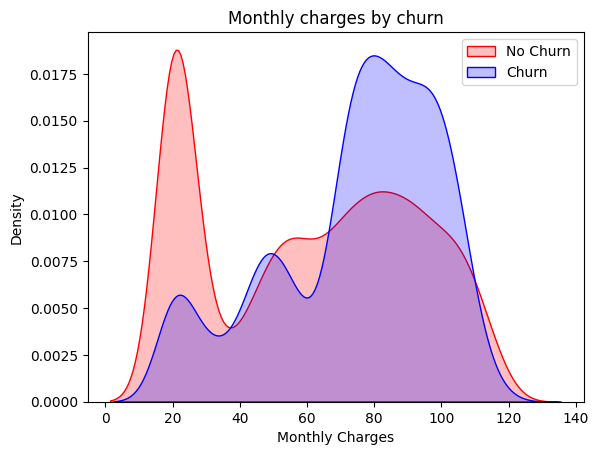

In [20]:
Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

In [21]:
data.select_dtypes(include='number').corr()


,SeniorCitizen,tenure,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016567,0.220173,0.150889
tenure,0.016567,1.000000,0.247900,-0.352229
MonthlyCharges,0.220173,0.247900,1.000000,0.193356
Churn,0.150889,-0.352229,0.193356,1.000000


<Axes: >

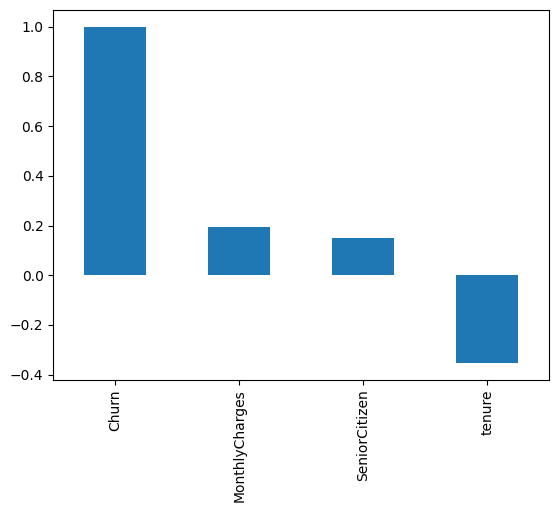

In [24]:

data.select_dtypes(include='number').corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

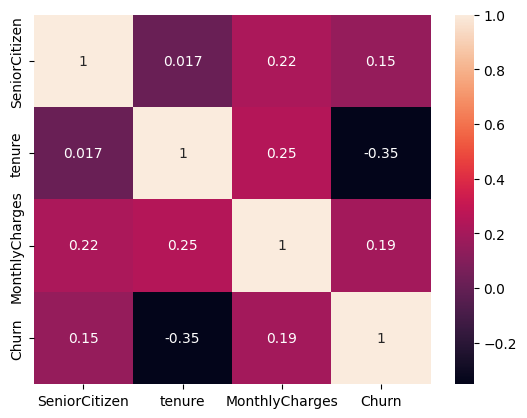

In [25]:
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True)

BIVARIATE ANALYSIS

In [27]:

target0=data.loc[data["Churn"]==0]
target1=data.loc[data["Churn"]==1]

<Axes: title={'center': 'Distribution of Gender for Churned Customers'}, xlabel='Partner', ylabel='count'>

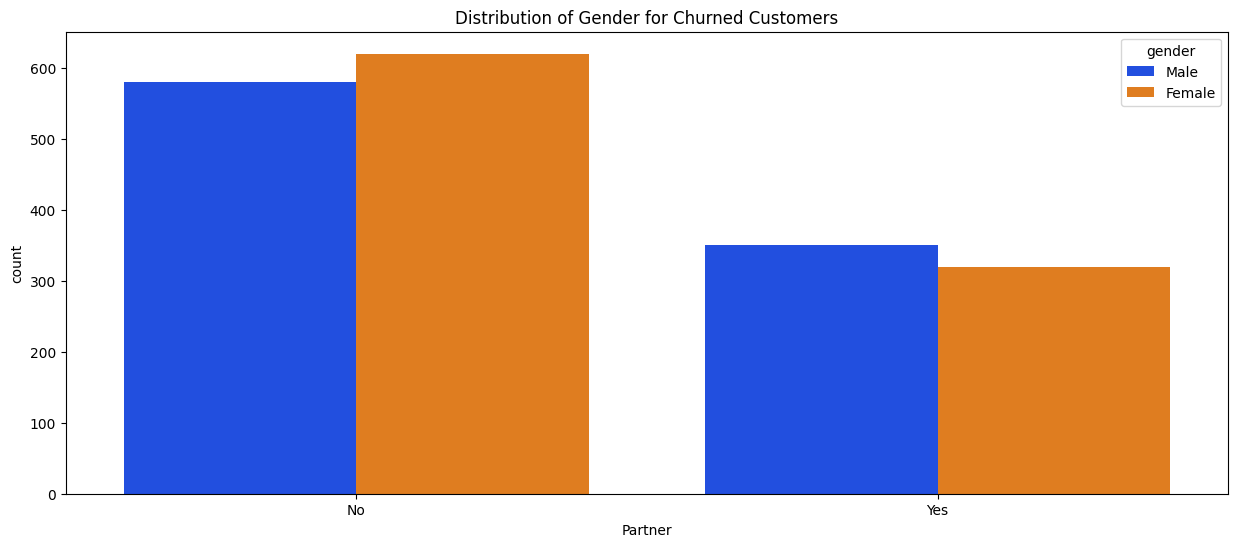

In [38]:
plt.figure(figsize=(15, 6))
plt.title('Distribution of Gender for Churned Customers')
sns.countplot(data = target1 , x= 'Partner',hue = 'gender',palette='bright')

<Axes: title={'center': 'Distribution of Gender for non Churned Customers'}, xlabel='Partner', ylabel='count'>

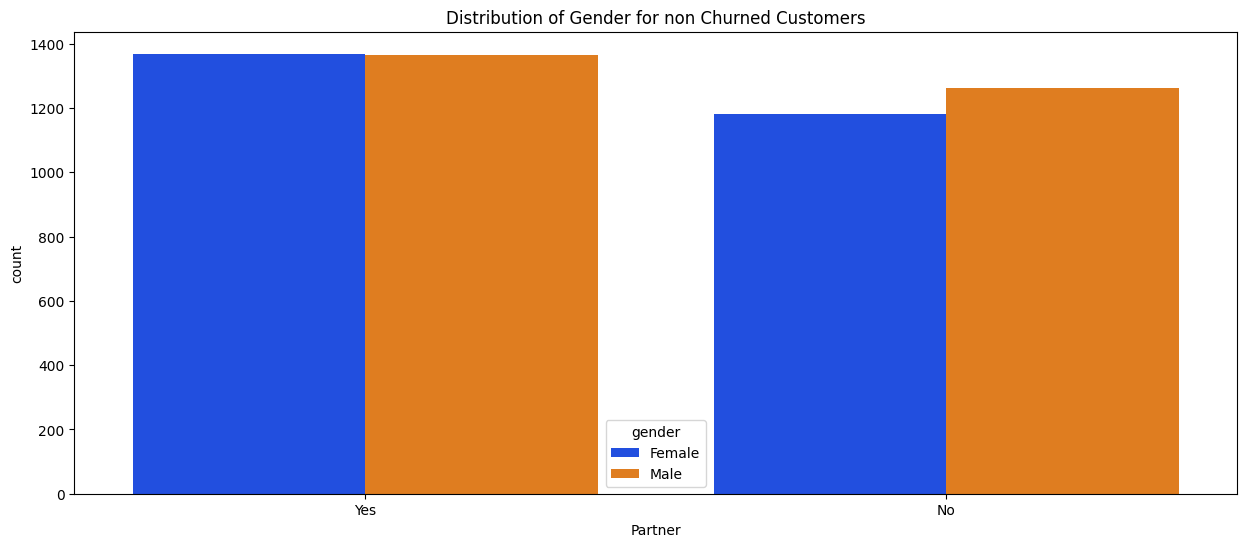

In [37]:
plt.figure(figsize=(15, 6))
plt.title('Distribution of Gender for non Churned Customers')
sns.countplot(data = target0 , x= 'Partner',hue = 'gender',palette='bright')

<Axes: title={'center': 'Distribution of PaymentMethod for Churned Customers'}, xlabel='PaymentMethod', ylabel='count'>

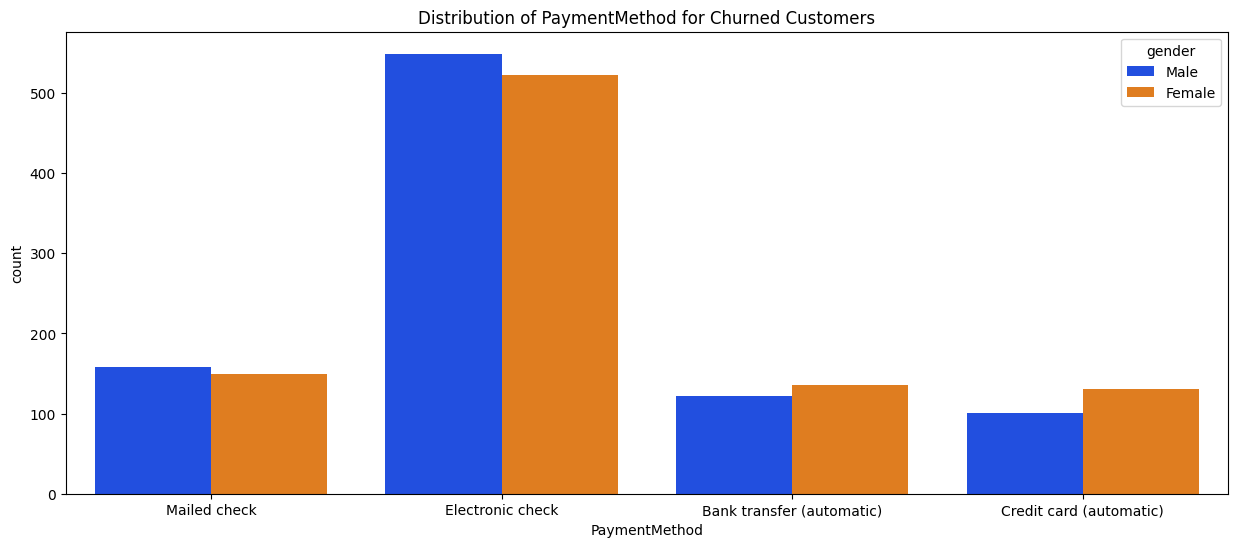

In [35]:

plt.figure(figsize=(15, 6))
plt.title('Distribution of PaymentMethod for Churned Customers')
sns.countplot(data = target1 , x= 'PaymentMethod',hue = 'gender',palette='bright')

<Axes: title={'center': 'Distribution of Contract for Churned Customers'}, xlabel='Contract', ylabel='count'>

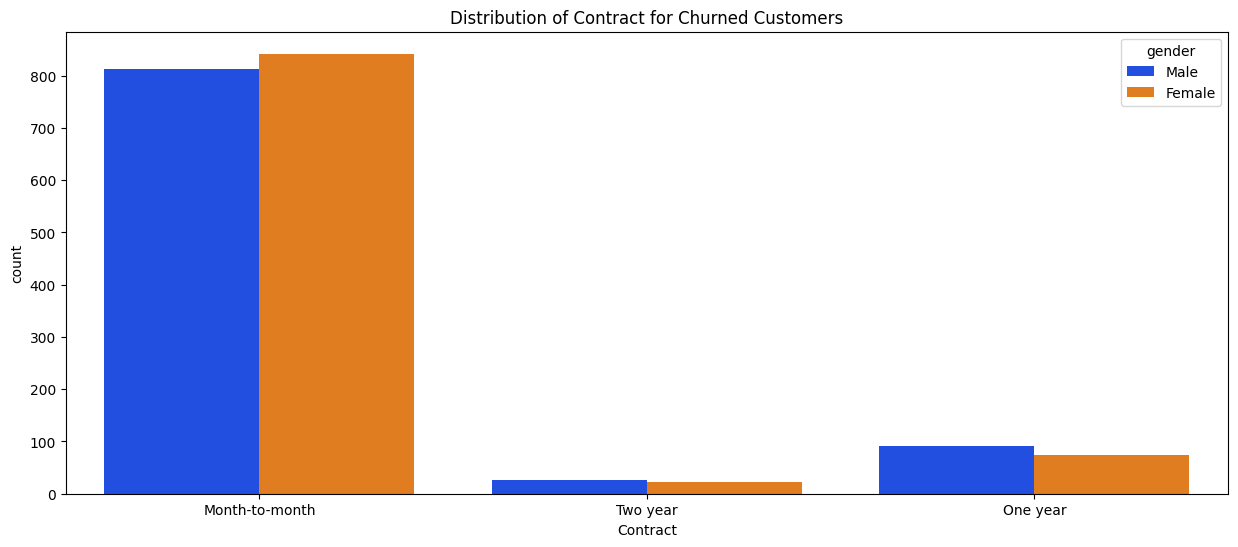

In [40]:

plt.figure(figsize=(15, 6))
plt.title('Distribution of Contract for Churned Customers')
sns.countplot(data = target1 , x= 'Contract',hue = 'gender',palette='bright')

<Axes: title={'center': 'Distribution of TechSupport for Churned Customers'}, xlabel='TechSupport', ylabel='count'>

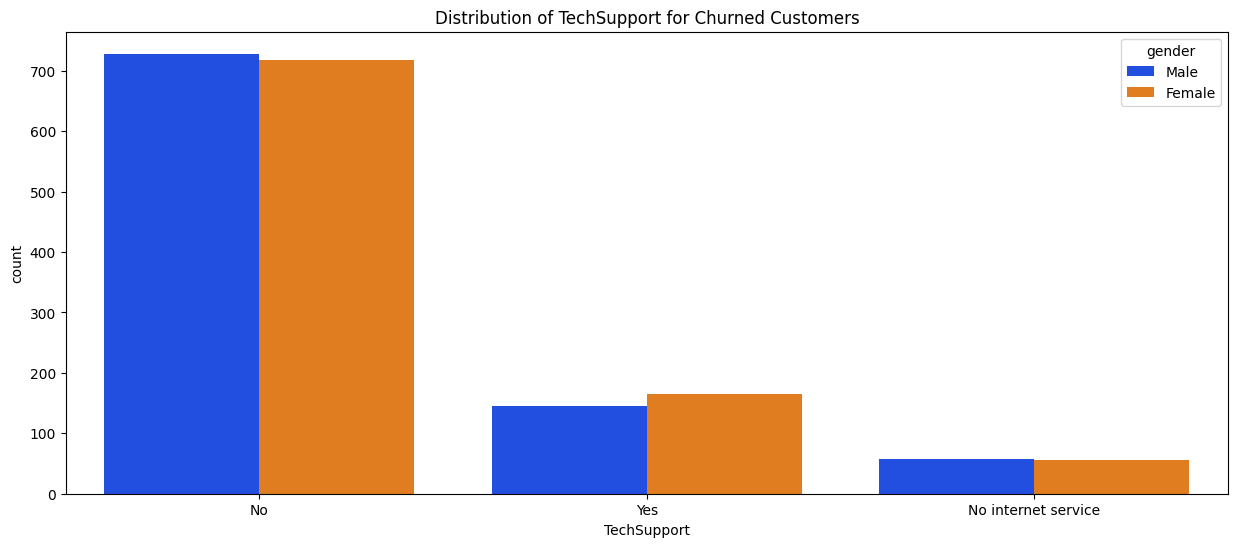

In [41]:

plt.figure(figsize=(15, 6))
plt.title('Distribution of TechSupport for Churned Customers')
sns.countplot(data = target1 , x= 'TechSupport',hue = 'gender',palette='bright')

<Axes: title={'center': 'Distribution of PhoneService for Churned Customers'}, xlabel='PhoneService', ylabel='count'>

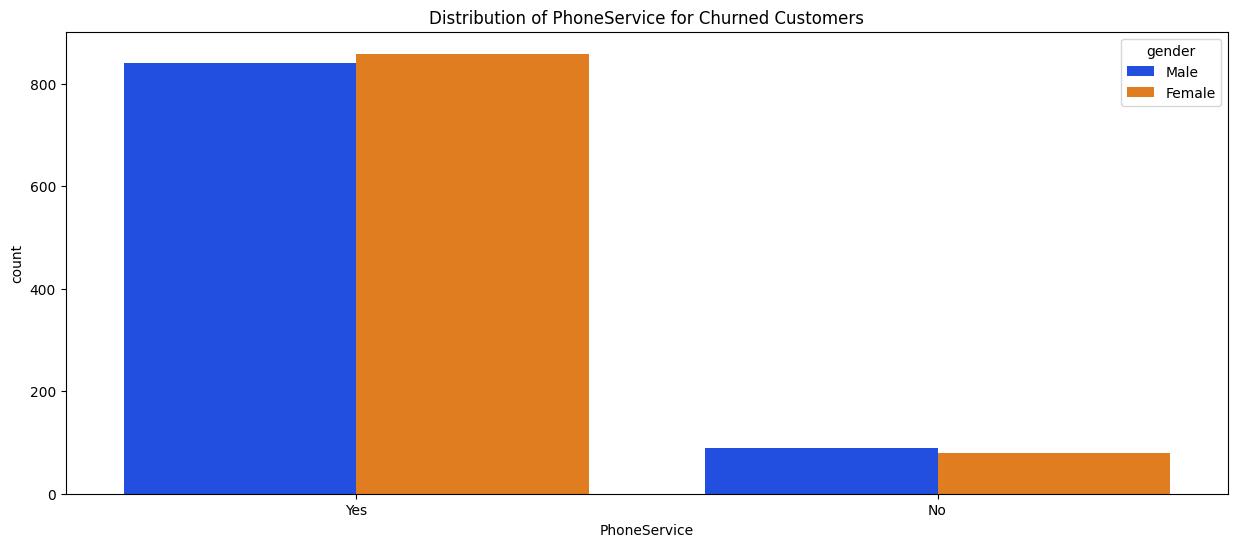

In [42]:

plt.figure(figsize=(15, 6))
plt.title('Distribution of PhoneService for Churned Customers')
sns.countplot(data = target1 , x= 'PhoneService',hue = 'gender',palette='bright')